# Load the tests to compare

In [1]:
%matplotlib inline
import os
import sys
import json
import pickle
import pandas as pd
import matplotlib.pyplot as plt

__file__ = globals()['_dh'][0]

# get an absolute path to the directory that contains parent files
project_dir = __file__ = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(project_dir, '..', '..')))

from experiments.utils.constants import TESTS_RESULTS_PATH
series = 70
start_test = 0
end_test = 36
tests_ids = [i for i in range(start_test, end_test)]
tests_names = [i for i in range(start_test, end_test)]

tests = {}


for test_id, test_name in zip(tests_ids, tests_names):
    test_path = os.path.join(
        TESTS_RESULTS_PATH,
        'series',
        str(series),
        'tests',
        str(test_id))
    with open(os.path.join(test_path, 'info.json')) as cf:
        info = json.loads(cf.read())
    with open(os.path.join(test_path, 'episodes.pickle'), 'rb') as input_file:
        episodes = pickle.load(input_file)
    tests.update({test_name: {
        'info': info,
        'episodes': episodes
    }})
test_types = [test['info']['algorithm'] for _, test in tests.items()]
print("availeble tests:\n {}\ntests_types:\n {}".format(
    list(tests.keys()),
    test_types))

availeble tests:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
tests_types:
 ['PG', 'A2C', 'A3C', 'PPO', 'IMPALA', 'PG', 'A2C', 'A3C', 'PPO', 'IMPALA', 'binpacking', 'latency_greedy', 'PG', 'A2C', 'A3C', 'PPO', 'IMPALA', 'PG', 'A2C', 'A3C', 'PPO', 'IMPALA', 'binpacking', 'latency_greedy', 'PG', 'A2C', 'A3C', 'PPO', 'IMPALA', 'PG', 'latency_greedy', 'binpacking', 'A2C', 'A3C', 'PPO', 'IMPALA']


# Necessary stats of a test

In [18]:
final_stats = []
for test_id in range(start_test, end_test):
    users_distances_episodes_average = [episode['users_distances'].mean() for episode in tests[test_id]['episodes']]
    users_distances_test_average = sum(users_distances_episodes_average) / len(users_distances_episodes_average)
    num_consolidated_episodes_average = [episode['num_consolidated'].mean() for episode in tests[test_id]['episodes']]
    num_consolidated_test_average = sum(num_consolidated_episodes_average) / len(num_consolidated_episodes_average)
    # print(users_distances_episodes_average)
    # print(users_distances_test_average)
    # print(num_consolidated_episodes_average)
    # print(num_consolidated_test_average)
    final_stats.append({
        'test_id': test_id,
        # 'checkpoint': tests[test_id]['info']['checkpoint'],
        'network_id': tests[test_id]['info']['network_id'],
        'trace_id_test': tests[test_id]['info']['trace_id_test'],
        'sample_episode_users_distances': tests[test_id]['episodes'][0]['users_distances'],
        'sample_episode_num_consolidated': tests[test_id]['episodes'][0]['num_consolidated'],
        # 'experiments': tests[test_id]['info']['experiments'],
        'penalty_latency': tests[test_id]['info']['penalty_latency'],
        'penalalty_consolidated': tests[test_id]['info']['penalty_consolidated'],
        'users_distances_test_average': users_distances_test_average,
        'num_consolidated_test_average': num_consolidated_test_average
    })

final_stats_df = pd.DataFrame(final_stats)
final_stats_df['test_types'] = test_types
# final_stats_df.loc[df['penalalty_consolidated']]

# TODO add the following information to the table (from the info.json file)
# - penatly_latency
# - penalty_conslidation

# compare tests - tables

In [19]:
final_stats_df

,test_id,network_id,trace_id_test,sample_episode_users_distances,sample_episode_num_consolidated,penalty_latency,penalalty_consolidated,users_distances_test_average,num_consolidated_test_average,test_types
0,0,1,0,0 0.588597 1 0.596758 2 0.56...,0 6 1 6 2 6 3 6 4 ...,4,4,0.629868,5.998682,PG
1,1,1,0,0 0.813912 1 0.562991 2 0.76...,0 1 1 2 2 2 3 2 4 ...,4,4,0.902581,2.802129,A2C
2,2,1,0,0 0.648722 1 0.656884 2 0.58...,0 4 1 4 2 4 3 4 4 ...,4,4,0.628679,3.912019,A3C
3,3,1,0,0 1.087915 1 1.249190 2 1.32...,0 5 1 5 2 5 3 5 4 ...,4,4,1.134283,4.946525,PPO
4,4,1,0,0 0.685288 1 0.635435 2 0.64...,0 6 1 6 2 6 3 6 4 ...,4,4,0.648344,5.999406,IMPALA
5,5,1,2,0 0.539684 1 0.403569 2 0.33...,0 6 1 6 2 6 3 6 4 ...,4,4,0.586894,5.999464,PG
6,6,1,2,0 0.947220 1 0.660654 2 0.68...,0 1 1 0 2 1 3 1 4 ...,4,4,0.944393,2.726079,A2C
7,7,1,2,0 0.537604 1 0.463694 2 0.42...,0 4 1 4 2 4 3 4 4 ...,4,4,0.601083,3.982769,A3C
8,8,1,2,0 1.156196 1 1.075727 2 1.06...,0 5 1 5 2 5 3 5 4 ...,4,4,0.978167,4.944715,PPO
9,9,1,2,0 0.559022 1 0.422907 2 0.39...,0 6 1 6 2 6 3 6 4 ...,4,4,0.596724,5.999435,IMPALA


In [20]:
trace_id_test = 0
penalty_latency = 4

In [21]:
df_latency  = pd.DataFrame([], columns=[
    'network_id',
    'test_types',
    'penalty_latency',
    'users_distances_test_average',
    'num_consolidated_test_average'])
for network_id in [1, 5, 6]:
    selected = final_stats_df[
        (final_stats_df['network_id'] == network_id) &
        ((final_stats_df['trace_id_test'] == trace_id_test) &
        (final_stats_df['penalty_latency'] == penalty_latency) |
        (final_stats_df['test_types'] == 'binpacking') |
        (final_stats_df['test_types'] == 'latency_greedy')) &
        (final_stats_df['test_types'] != 'A3C') &
        (final_stats_df['test_types'] != 'A2C')].sort_values(by=[
            'users_distances_test_average'], ascending=False)[[
                'network_id',
                'test_types',
                'penalty_latency',
                'users_distances_test_average',
                'num_consolidated_test_average',
            ]].reset_index(drop=True)
    df_latency = df_latency.append(selected)
df_latency

,network_id,test_types,penalty_latency,users_distances_test_average,num_consolidated_test_average
0,1,binpacking,10,1.196196,6.000000
1,1,PPO,4,1.134283,4.946525
2,1,IMPALA,4,0.648344,5.999406
3,1,PG,4,0.629868,5.998682
4,1,latency_greedy,10,0.184509,1.766001
0,5,binpacking,10,2.273855,6.000000
1,5,PPO,4,2.125425,4.943991
2,5,IMPALA,4,1.318397,5.960628
3,5,PG,4,1.279426,4.984941
4,5,latency_greedy,10,0.898404,3.302635


In [22]:
df_consolidation  = pd.DataFrame([], columns=[
    'network_id',
    'test_types',
    'penalty_latency',
    'users_distances_test_average',
    'num_consolidated_test_average'])
for network_id in [1, 5, 6]:    
    selected = final_stats_df[
        (final_stats_df['network_id'] == network_id) &
        ((final_stats_df['trace_id_test'] == trace_id_test) &
        (final_stats_df['penalty_latency'] == penalty_latency) |
        (final_stats_df['test_types'] == 'binpacking') |
        (final_stats_df['test_types'] == 'latency_greedy')) &
        (final_stats_df['test_types'] != 'A3C') &
        (final_stats_df[
            'test_types'] != 'A2C')].sort_values(by=['num_consolidated_test_average'])[[
                'network_id',
                'test_types',
                'penalty_latency',
                'users_distances_test_average',
                'num_consolidated_test_average',
            ]].reset_index(drop=True)
    df_consolidation = df_consolidation.append(selected)
df_consolidation

,network_id,test_types,penalty_latency,users_distances_test_average,num_consolidated_test_average
0,1,latency_greedy,10,0.184509,1.766001
1,1,PPO,4,1.134283,4.946525
2,1,PG,4,0.629868,5.998682
3,1,IMPALA,4,0.648344,5.999406
4,1,binpacking,10,1.196196,6.000000
0,5,latency_greedy,10,0.898404,3.302635
1,5,PPO,4,2.125425,4.943991
2,5,PG,4,1.279426,4.984941
3,5,IMPALA,4,1.318397,5.960628
4,5,binpacking,10,2.273855,6.000000


# Findings
1. A2C and A3C results are not explainable in both trainnig and testing
2. The ordering for consolidation is in network (16-32-48) networks latency_greedy<PG<PPO<IMPALA<binpacking
3. The ordering for latency is in (16-32-48) networks binpacking<PPO<IMPALA<PG<latency_greedy

# compare tests - plots

In [23]:
# transform the dataframe for plotting
df_latency_to_plot = pd.DataFrame([], columns=['# users', 'binpacking', 'PPO', 'IMPALA', 'PG', 'latency_greedy'])
for network_id, num_users in zip([1, 5, 6], [16, 32, 48]):
    data = {'# users': [num_users]}
    for algorithm in ['binpacking', 'PPO', 'IMPALA', 'PG', 'latency_greedy']:
        value = df_latency[(df_latency['network_id'] == network_id) & (df_latency['test_types'] == algorithm)]['users_distances_test_average'].values[0]
        data.update({algorithm: [value]})
    selected = pd.DataFrame(data)
    df_latency_to_plot = df_latency_to_plot.append(selected)
df_latency_to_plot.set_index('# users', inplace=True)
df_latency_to_plot

,binpacking,PPO,IMPALA,PG,latency_greedy
# users,,,,,
16,1.196196,1.134283,0.648344,0.629868,0.184509
32,2.273855,2.125425,1.318397,1.279426,0.898404
48,3.313274,3.303872,1.969867,1.962372,1.494312


In [24]:
# transform the dataframe for plotting
df_consolidation_to_plot = pd.DataFrame([], columns=['# users', 'latency_greedy', 'PPO', 'PG', 'IMPALA', 'binpacking',])
for network_id, num_users in zip([1, 5, 6], [16, 32, 48]):
    data = {'# users': [num_users]}
    for algorithm in ['latency_greedy', 'PPO', 'PG', 'IMPALA', 'binpacking']:
        value = df_consolidation[(df_consolidation['network_id'] == network_id) & (df_consolidation['test_types'] == algorithm)]['num_consolidated_test_average'].values[0]
        data.update({algorithm: [value]})
    selected = pd.DataFrame(data)
    df_consolidation_to_plot = df_consolidation_to_plot.append(selected)
df_consolidation_to_plot.set_index('# users', inplace=True)
df_consolidation_to_plot

,latency_greedy,PPO,PG,IMPALA,binpacking
# users,,,,,
16,1.766001,4.946525,5.998682,5.999406,6.0
32,3.302635,4.943991,4.984941,5.960628,6.0
48,1.876050,4.512728,4.995149,5.998885,6.0


<Figure size 432x288 with 0 Axes>

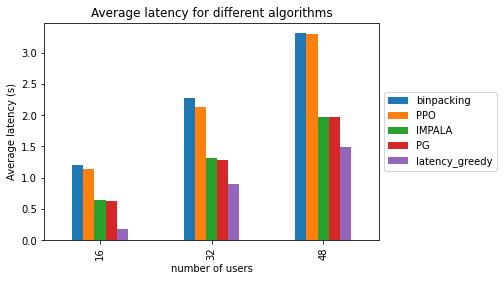

In [25]:
import matplotlib.pyplot as plt
plt.tight_layout()
df_latency_to_plot.plot(kind='bar')
plt.title("Average latency for different algorithms")
plt.xlabel("number of users")
plt.ylabel("Average latency (s)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('../../paper-figs/test-average-latency.pdf', bbox_inches='tight')
plt.show()


<Figure size 432x288 with 0 Axes>

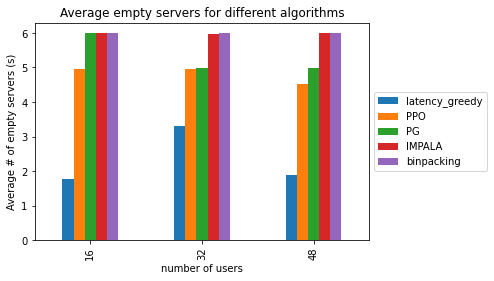

In [26]:
import matplotlib.pyplot as plt
plt.tight_layout()
df_consolidation_to_plot.plot(kind='bar')
plt.title("Average empty servers for different algorithms")
plt.xlabel("number of users")
plt.ylabel("Average # of empty servers (s)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('../../paper-figs/test-average-empty-servers.pdf')
plt.show()


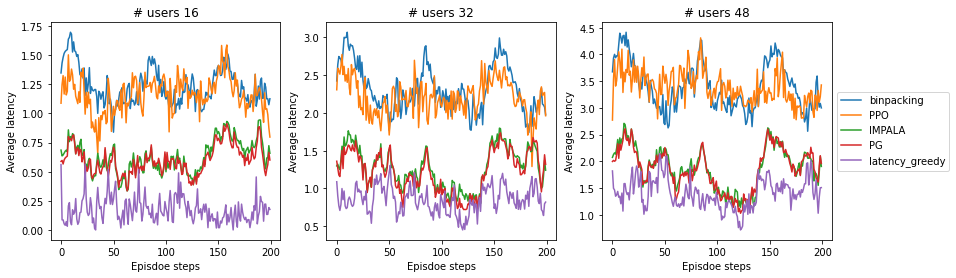

,sample_episode_users_distances,test_types
31,0 3.674466 1 3.930884 2 4.00...,binpacking
27,0 2.770672 1 3.531513 2 3.90...,PPO
28,0 2.072998 1 2.126564 2 2.15...,IMPALA
24,0 1.996416 1 2.016237 2 2.00...,PG
30,0 1.819060 1 1.494094 2 1.46...,latency_greedy


In [27]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

for network_id, num_users, ax in zip([1, 5, 6], [16, 32, 48], axes):
    episodes_users_distances = final_stats_df[
        (final_stats_df['network_id'] == network_id) &
        ((final_stats_df['trace_id_test'] == trace_id_test) &
        (final_stats_df['penalty_latency'] == penalty_latency) |
        (final_stats_df['test_types'] == 'binpacking') |
        (final_stats_df['test_types'] == 'latency_greedy')) &
        (final_stats_df['test_types'] != 'A3C') &
        (final_stats_df['test_types'] != 'A2C')].sort_values(by=['users_distances_test_average'], ascending=False)[['sample_episode_users_distances', 'test_types']]


    for _, row in episodes_users_distances.iterrows():
        ax.plot(row['sample_episode_users_distances'][:200], label=row['test_types'])
        # print(f"test_types: {row['test_types']}")
        # print(f"sample episdoe users distances: {row['sample_episode_users_distances'].tolist()}")
    ax.set_title('# users {}'.format(num_users))
for ax in axes.flat:
    ax.set(xlabel='Episdoe steps', ylabel='Average latency')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('../../paper-figs/test-timesteps-latency.pdf')
plt.show()
episodes_users_distances

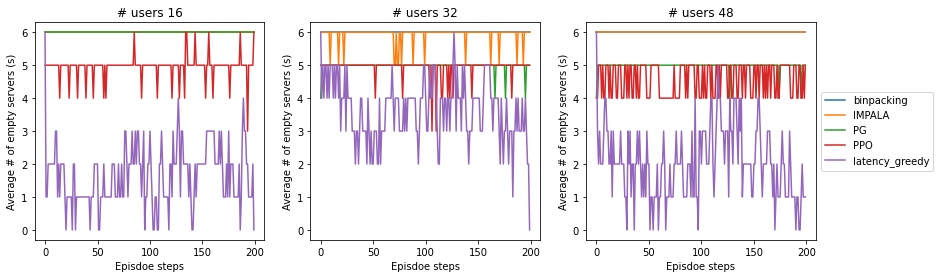

,sample_episode_num_consolidated,test_types
31,0 6 1 6 2 6 3 6 4 ...,binpacking
28,0 6 1 6 2 6 3 6 4 ...,IMPALA
24,0 4 1 5 2 5 3 5 4 ...,PG
27,0 4 1 4 2 5 3 5 4 ...,PPO
30,0 6 1 3 2 2 3 3 4 ...,latency_greedy


In [28]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

for network_id, num_users, ax in zip([1, 5, 6], [16, 32, 48], axes):
    episodes_consolidation = final_stats_df[
        (final_stats_df['network_id'] == network_id) &
        ((final_stats_df['trace_id_test'] == trace_id_test) &
        (final_stats_df['penalty_latency'] == penalty_latency) |
        (final_stats_df['test_types'] == 'binpacking') |
        (final_stats_df['test_types'] == 'latency_greedy')) &
        (final_stats_df['test_types'] != 'A3C') &
        (final_stats_df['test_types'] != 'A2C')].sort_values(by=['num_consolidated_test_average'], ascending=False)[['sample_episode_num_consolidated', 'test_types']]


    for _, row in episodes_consolidation.iterrows():
        ax.plot(row['sample_episode_num_consolidated'][:200], label=row['test_types'])
        # print(f"test_types: {row['test_types']}")
        # print(f"sample episdoe users distances: {row['sample_episode_users_distances'].tolist()}")
    ax.set_title('# users {}'.format(num_users))
for ax in axes.flat:
    ax.set(xlabel='Episdoe steps', ylabel='Average # of empty servers (s)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('../../paper-figs/test-timesteps-consolidation.pdf')
plt.show()
episodes_consolidation

In [28]:
test_id_see = 4
len(tests[test_id_see]['episodes'][0]['num_moves'][tests[test_id_see]['episodes'][0]['num_moves']!=0])

483

In [22]:
tests[3]

{'info': {'series': 66,
  'dataset_id': 6,
  'workload_id': 0,
  'network_id': 1,
  'trace_id': 2,
  'trace_id_test': 0,
  'checkpoint': 1005,
  'experiment_str': 'PPO_SimEdgeEnv_3c048_00001_1_penalty_latency=4_2021-12-13_22-23-28',
  'experiments': 3,
  'episode_length': 3453,
  'num_episodes': 20,
  'algorithm': 'PPO',
  'penalty_latency': 4,
  'penalty_consolidated': 4,
  'num_workers': 4},
 'episodes': [                                                action  \
  0     [7, 6, 5, 6, 6, 7, 6, 5, 7, 5, 6, 6, 7, 5, 6, 7]   
  1     [6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 4]   
  2     [6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 4]   
  3     [6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 4]   
  4     [6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 4]   
  ...                                                ...   
  3448  [6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5]   
  3449  [6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 4, 6, 6, 6, 4]   
  3450  [6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 4, 6, 6, 